#### Description

The data for this example come from a study of the effects of childhood sexual abuse on adult females. 45 women being treated at a clinic, who reported childhood sexual abuse, were measured for post traumatic stress disorder and childhood physical abuse both on standardized scales. 31 women also being treated at the same clinic, who did not report childhood sexual abuse were also measured. The full study was more complex than reported here and so readers interested in the subject matter should refer to the original article.

###### Referencia:
* cpa: Childhood physical abuse on standard scale

* ptsd: Post-traumatic stress disorder on standard scale

* csa: Childhood sexual abuse - abused or not abused

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import faraway.utils
import faraway.datasets.sexab  

![](../Images/Ex_MLR1.png)

In [3]:
# cargar base de datos de ejemplo

sexab = faraway.datasets.sexab.load()
sexab

,cpa,ptsd,csa
1,2.04786,9.71365,Abused
2,0.83895,6.16933,Abused
3,-0.24139,15.15926,Abused
4,-1.11461,11.31277,Abused
5,2.01468,9.95384,Abused
...,...,...,...
72,2.17626,6.57281,NotAbused
73,-0.23208,-3.11622,NotAbused
74,-1.85753,-0.46996,NotAbused
75,2.85253,6.84304,NotAbused


#### Grupo 'Abused'

In [6]:
sexab_abused = sexab[sexab['csa'] == 'Abused']
sexab_abused = sexab_abused.drop('csa', axis = 1)
sexab_abused.head()

,cpa,ptsd
1,2.04786,9.71365
2,0.83895,6.16933
3,-0.24139,15.15926
4,-1.11461,11.31277
5,2.01468,9.95384


In [11]:
sexab_abused.describe()

,cpa,ptsd
count,45.000000,45.000000
mean,3.075197,11.941093
std,2.371215,3.440152
min,-1.114610,5.984910
25%,1.414620,9.374300
50%,2.627460,11.312770
75%,4.316890,14.901310
max,8.646900,18.992510


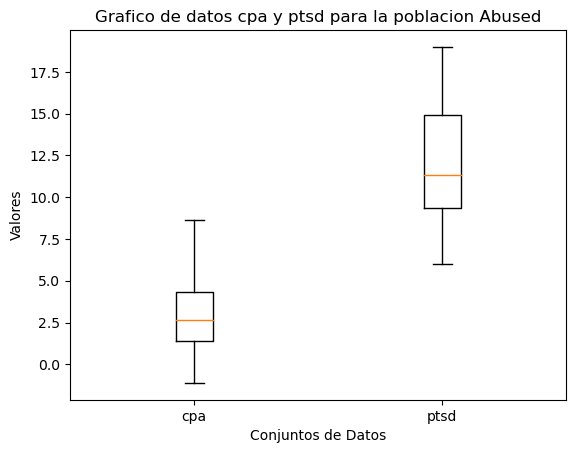

In [7]:
cpa_data_abused = sexab_abused['cpa']
ptsd_data_abused = sexab_abused['ptsd']

fig, ax = plt.subplots()

boxplot_data = [cpa_data_abused, ptsd_data_abused]
ax.boxplot(boxplot_data)

ax.set_xticklabels(['cpa','ptsd'])
ax.set_title('Grafico de datos cpa y ptsd para la poblacion Abused')
ax.set_xlabel('Conjuntos de Datos')
ax.set_ylabel('Valores')
plt.show()

#### Grupo 'Not Abused'

In [8]:
sexab_not_abused = sexab[sexab['csa'] == 'NotAbused']
sexab_not_abused = sexab_not_abused.drop('csa', axis = 1)
sexab_not_abused.head()

,cpa,ptsd
46,1.49181,6.14200
47,0.60961,0.74457
48,1.43335,3.45957
49,-0.33664,6.91218
50,-3.12036,4.54166


In [10]:
sexab_not_abused.describe()

,cpa,ptsd
count,31.000000,31.000000
mean,1.308849,4.695874
std,1.970577,3.519743
min,-3.120360,-3.349210
25%,-0.229940,3.544485
50%,1.321650,5.794470
75%,2.830905,6.838045
max,5.049740,10.914470


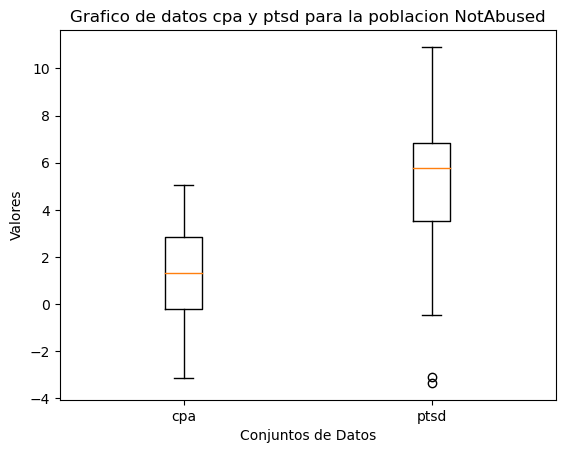

In [9]:
cpa_data_not_abused = sexab_not_abused['cpa']
ptsd_data_not_abused = sexab_not_abused['ptsd']

fig, ax = plt.subplots()

boxplot_data = [cpa_data_not_abused, ptsd_data_not_abused]
ax.boxplot(boxplot_data)

ax.set_xticklabels(['cpa','ptsd'])
ax.set_title('Grafico de datos cpa y ptsd para la poblacion NotAbused')
ax.set_xlabel('Conjuntos de Datos')
ax.set_ylabel('Valores')
plt.show()

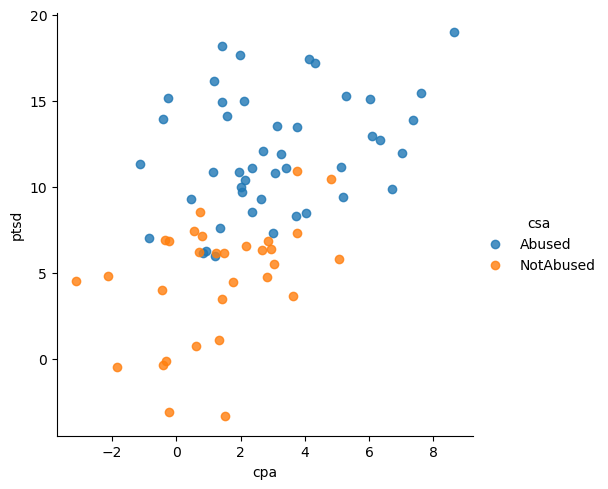

In [5]:
# Gráfico de dispersión cpa vs ptsd por grupo
sns.lmplot(x='cpa', y='ptsd', hue='csa', data=sexab, fit_reg=False)

### comenta los resultados de los descriptivos



In [21]:
mean_cpa_abused = sexab_abused['cpa']
mean_cpa_noabused = sexab_not_abused['cpa']
mean_ptsd_abused = sexab_abused['ptsd']
mean_ptsd_noabused = sexab_not_abused['ptsd']

In [17]:
import scipy.stats as stats

#### Variable CPA

In [27]:
#Prueba con la variable CPA
t_statistic, p_values = stats.ttest_ind(mean_cpa_abused, mean_cpa_noabused)

In [28]:
print("Estadística t:", t_statistic)
print("Valor p:", p_values)

Estadística t: 3.4126048419588426
Valor p: 0.0010464061426132783


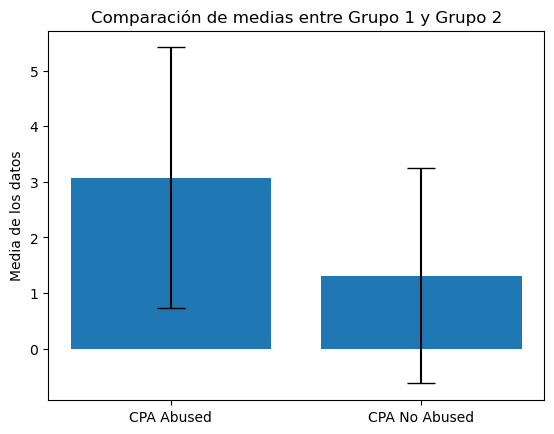

In [34]:
# Crear un gráfico de barras para comparar los dos grupos
plt.bar(['CPA Abused', 'CPA No Abused'], [np.mean(mean_cpa_abused), np.mean(mean_cpa_noabused)], yerr=[np.std(mean_cpa_abused), np.std(mean_cpa_noabused)], capsize=10)
plt.ylabel('Media de los datos')
plt.title('Comparación de medias entre Grupo 1 y Grupo 2')

# Mostrar el gráfico
plt.show()

#### Variable PTSD

In [31]:
#Prueba con la variable PTSD
t_statistic, p_values = stats.ttest_ind(mean_ptsd_abused, mean_ptsd_noabused)
print("Estadística t:", t_statistic)
print("Valor p:", p_values)

Estadística t: 8.938657095668173
Valor p: 2.1719334389283135e-13


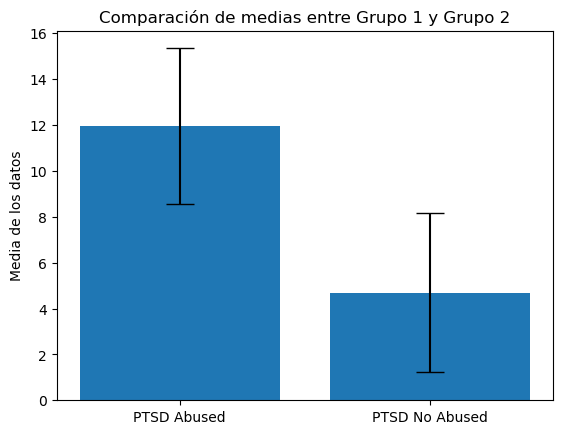

In [33]:
# Crear un gráfico de barras para comparar los dos grupos
plt.bar(['PTSD Abused', 'PTSD No Abused'], [np.mean(mean_ptsd_abused), np.mean(mean_ptsd_noabused)], yerr=[np.std(mean_ptsd_abused), np.std(mean_ptsd_noabused)], capsize=10)
plt.ylabel('Media de los datos')
plt.title('Comparación de medias entre Grupo 1 y Grupo 2')

# Mostrar el gráfico
plt.show()

In [35]:
# construye tres modelos de regresión diferentes 
import statsmodels.formula.api as smf

In [42]:
sexab.loc[sexab['csa'] == 'Abused', 'csa'] = 1
sexab.loc[sexab['csa'] != 1, 'csa'] = 0
sexab

,cpa,ptsd,csa
1,2.04786,9.71365,1
2,0.83895,6.16933,1
3,-0.24139,15.15926,1
4,-1.11461,11.31277,1
5,2.01468,9.95384,1
...,...,...,...
72,2.17626,6.57281,0
73,-0.23208,-3.11622,0
74,-1.85753,-0.46996,0
75,2.85253,6.84304,0


In [43]:
# Modelo 1
m1 = smf.ols('csa ~ cpa + ptsd', data=sexab).fit()

ValueError: endog has evaluated to an array with multiple columns that has shape (76, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

Con que modelo se queda? Por que?

## Ejercicio 2

![](../Images/Ex_MLR2.png)

In [8]:
import faraway.datasets.whiteside

whiteside = faraway.datasets.whiteside.load()
whiteside.head()

,Insul,Temp,Gas
1,Before,-0.8,7.2
2,Before,-0.7,6.9
3,Before,0.4,6.4
4,Before,2.5,6.0
5,Before,2.9,5.8


## Ejercicio 3

![](../Images/Ex_MLR3.png)

In [9]:
import faraway.datasets.fruitfly

fruitfly = faraway.datasets.fruitfly.load()
fruitfly.head()

,thorax,longevity,activity
1,0.68,37,many
2,0.68,49,many
3,0.72,46,many
4,0.72,63,many
5,0.76,39,many
